Nama: Jericho Siahaya <br>
Email: jericho.siahaya@gmail.com <br>
Domisili Asal: Jayapura, Papua

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-10-23 15:18:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.49MB/s    in 43s     

2020-10-23 15:18:55 (7.16 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# ekstrak data 
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'scissors', 'rps-cv-images', 'paper', 'README_rpc-cv-images.txt']

Mendefinisikan path terlebih dahulu baru membuat direktori

In [5]:
base_dir = '/tmp/rockpaperscissors' #base folder data
train_dir = os.path.join(base_dir,'train') # folder train
validation_dir = os.path.join(base_dir, 'val') # folder validasi
roc_dir = os.path.join(base_dir,'rock') # folder rock
pap_dir = os.path.join(base_dir, 'paper') # folder paper
sci_dir = os.path.join(base_dir, 'scissors') # folder scissors

In [6]:
# membuat direktori
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
train_roc = os.path.join(train_dir, 'rock') # folder data train rock
train_pap = os.path.join(train_dir, 'paper') # folder data train paper
train_sci = os.path.join(train_dir, 'scissors') # folder data train scissors
val_roc = os.path.join(validation_dir, 'rock') # folder validasi rock
val_pap = os.path.join(validation_dir, 'paper') # folder validasi paper
val_sci = os.path.join(validation_dir, 'scissors') # folder validasi scissors

In [8]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [19]:
# copy seluruh data dari masing-masing folder ke dalam directory
import shutil

for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

In [9]:
# split data
from sklearn.model_selection import train_test_split

train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [10]:
# img data generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150)
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [22]:
os.listdir('/tmp/rockpaperscissors/')

['rock',
 'train',
 'scissors',
 'rps-cv-images',
 'val',
 'paper',
 'README_rpc-cv-images.txt']

In [23]:
# membuat model

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
# deklarasi fungsi callback 
class callbackFunction(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAccuracy > 97%")
      self.model.stop_training = True

callbacks = callbackFunction()

In [34]:
# catatan: pertama sudah saya run dengan epochs 25 hasil akhir > 97%, lalu saya coba pakai callback dikarenakan di epoch ke 21 atau 22 sudah > 97%, sekarang di epochs 1 sudah langsung >97%.

history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=20,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20

Accuracy > 97%
25/25 - 51s - loss: 0.0730 - accuracy: 0.9750 - val_loss: 0.0877 - val_accuracy: 0.9750


Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1.png
01dM3ewPIsnBICu1.png
rock


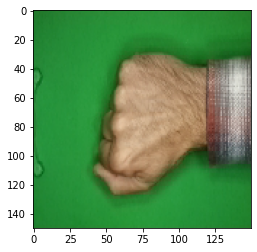

In [37]:
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')
